## Introduction to Computer Vision
## In-class 1. Sudoku recognition
### Aleksandr Belov

You can change index of ```samples[i]``` or `examples` folder to check result, see **Read image** part.

In [1]:
import os

import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

from skimage import io
from skimage.transform import rescale

from Belov_inclass1 import normalize_image, recognize_digits, SUDOKU_SHAPE
from sudoku import solve_sudoku

%matplotlib inline

### Get image paths

In [2]:
PATH_TO_TEMPLATES = 'templates'
IMG_FORMATS = ['jpg', 'jpeg', 'png']

is_img = lambda x: any(x.endswith(format) for format in IMG_FORMATS)

In [3]:
def get_image_paths(path):
    files = os.listdir(path)
    files = map(str.lower, files)
    files = filter(is_img, files)
    image_paths = [os.path.join(path, s) for s in files]
    
    return image_paths

## 0. Read image

/Users/aleksandr.belov/work/tools/anaconda3/envs/u_env/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


(-0.5, 3263.5, 2447.5, -0.5)

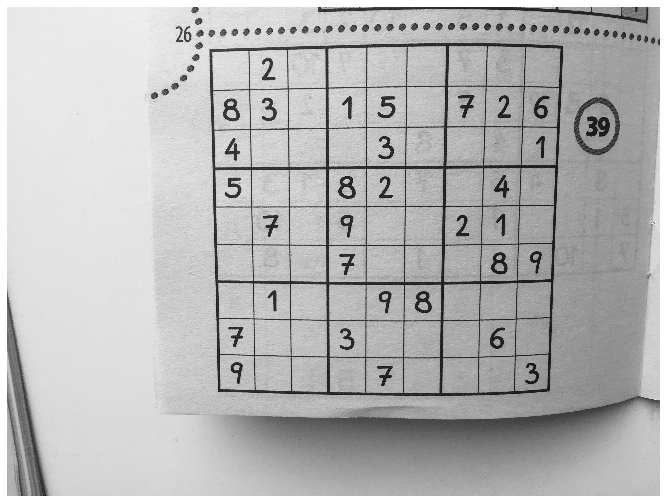

In [4]:
PATH_TO_SAMPLES = 'examples1'
#PATH_TO_SAMPLES = 'examples2'
samples = get_image_paths(PATH_TO_SAMPLES)
IDX = 3

fname = samples[IDX]
image_full = io.imread(fname, as_gray=True)
image_scaled = rescale(image_full, 0.3)

plt.figure(figsize=(18, 9))
plt.imshow(image_full, cmap=cm.gray)
plt.axis('off')

## 1. Normalization

(-0.5, 499.5, 499.5, -0.5)

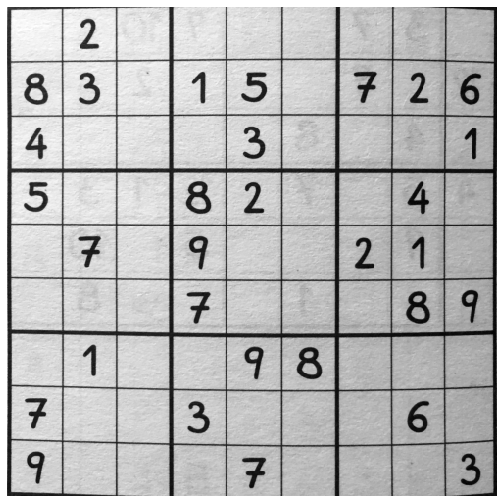

In [5]:
image_normalized = normalize_image(image_full)

plt.figure(figsize=(18, 9))
plt.imshow(image_normalized, cmap=cm.gray)
plt.axis('off')

## 2. Digits recognition

(-0.5, 499.5, 499.5, -0.5)

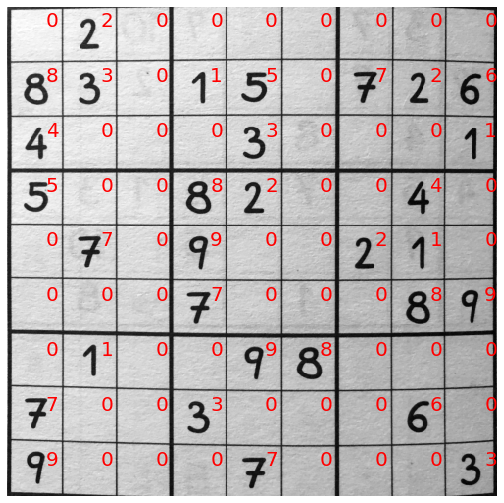

In [6]:
size_d = round(SUDOKU_SHAPE/9)

digits = recognize_digits(image_normalized)
plt.figure(figsize=(18, 9))
plt.imshow(image_normalized, cmap=cm.gray)

for i in range(9):
    for j in range(9):
        plt.text((j+1)*size_d-17, i*size_d+20, str(digits[i, j]), fontdict={'size':20, 'color':'r'})
        
plt.axis('off')

## 3. Solve sudoku

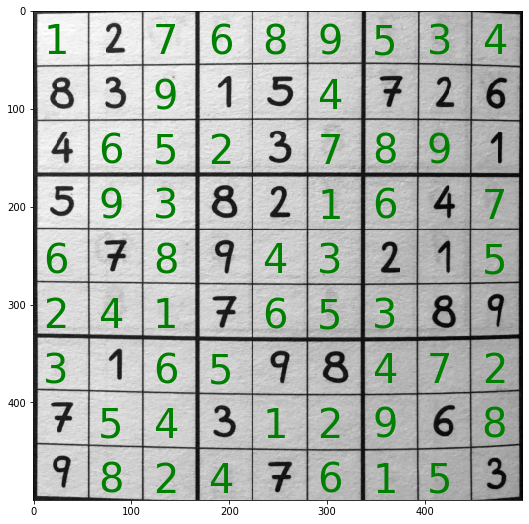

In [7]:
solution = solve_sudoku(digits)

plt.figure(figsize=(18, 9))
plt.imshow(image_normalized, cmap=cm.gray)
for i in range(9):
    for j in range(9):
        if digits[i, j] == 0:
            plt.text((j)*size_d+10, (i+1)*size_d-12, str(solution[i, j]), fontdict={'size':40, 'color':'g'})